# Experiment 3 D



In this experiment we try to compute the same SHM formula as done in experiment 3d, but with auxillary variables


$$
v = A \omega \sin(\omega t)
$$

In [1]:
from kan.MultKAN import MultKAN



In [94]:
from kan.utils import create_dataset, augment_input
from sympy import symbols, cos , sin
import torch

# Set seed and precision
seed = 1
torch.manual_seed(seed)
torch.set_default_dtype(torch.float64)

# Step 1: Define input variables
input_variables = A, omega, t = symbols('A omega t')

# # Step 2: Define auxiliary variable
theta = omega * t
sin_theta = sin(theta)

aux_vars = (theta , sin_theta)



# Step 3: Define function f: input → output (s = A ω sin(ωt))
f = lambda x: x[:, [0]] * x[: , [1]] * torch.sin(x[:, [1]] * x[:, [2]])

# Step 4: Create dataset
dataset = create_dataset(
    f,
    n_var=3,
    ranges=[
        [1, 10],       # A
        [0.5, 5.0],    # omega
        [0, 2 * 3.1416]  # t (approx 0 to 2π)
    ]
)

# # Step 5: Add auxiliary variable θ = ωt
dataset = augment_input(input_variables, aux_vars, dataset)
input_variables = aux_vars + input_variables  # Optional reordering for interpretability


In [95]:
len(dataset['train_input'])

1000

In [96]:
model = MultKAN(width=[5,[0,1] ], mult_arity=3, grid=3, k=3, seed=seed)

checkpoint directory created: ./model
saving model version 0.0


In [97]:
model.fit(dataset, steps=50, lamb=1e-5, lamb_coef=1.0);

| train_loss: 1.57e-01 | test_loss: 1.55e-01 | reg: 1.07e+01 | : 100%|█| 50/50 [00:06<00:00,  7.22it

saving model version 0.1


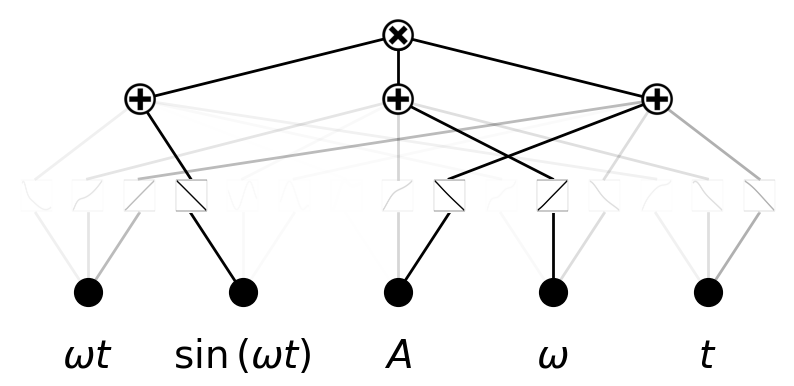

In [98]:
# model(dataset['train_input'])
model.plot(in_vars=input_variables, scale=1.0, varscale=0.7)

In [99]:
model = model.prune()

saving model version 0.2


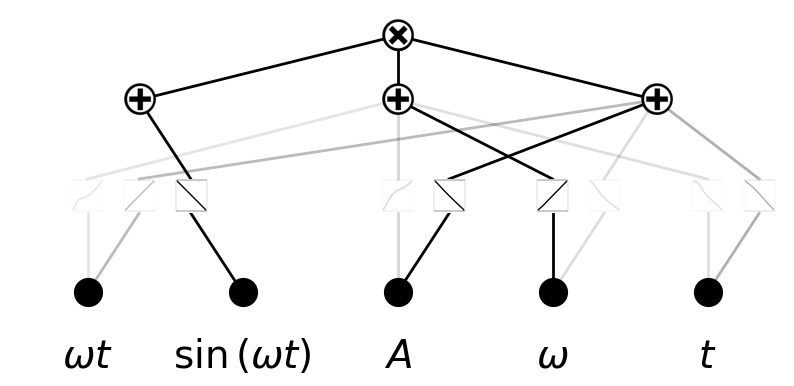

In [100]:
model.plot(in_vars=input_variables, scale=1.0, varscale=0.7)

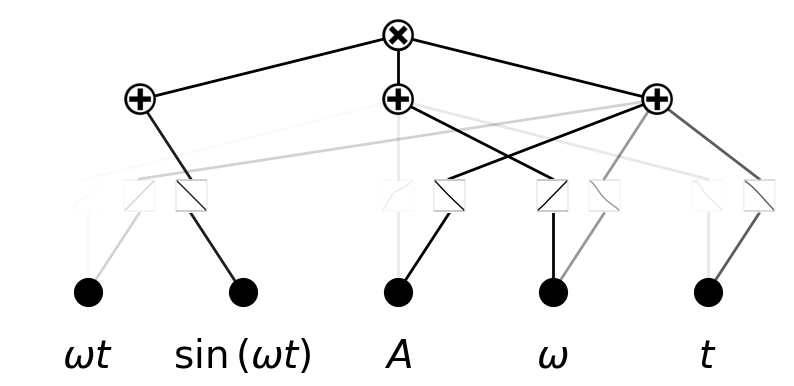

In [101]:
model.plot(metric='forward_n' , in_vars=input_variables, scale=1.0, varscale=0.7)

In [102]:
model.fit(dataset, steps=50, lamb=1e-5, lamb_coef=1.0);

| train_loss: 1.53e-02 | test_loss: 1.58e-02 | reg: 1.12e+01 | : 100%|█| 50/50 [00:04<00:00, 10.75it

saving model version 0.3


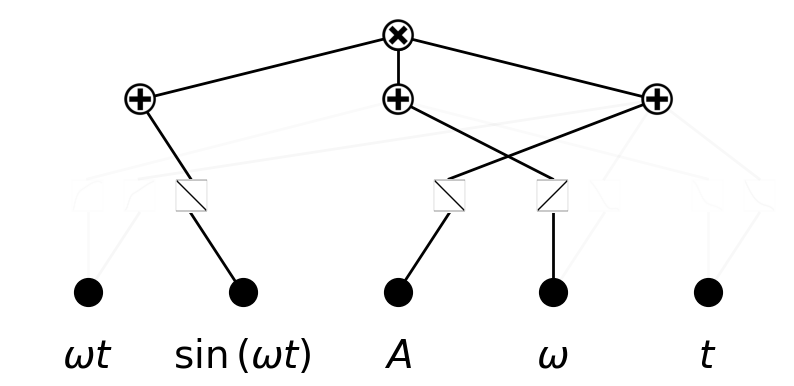

In [103]:
model.plot(in_vars=input_variables, scale=1.0, varscale=0.7)

In [104]:
model = model.prune()

saving model version 0.4


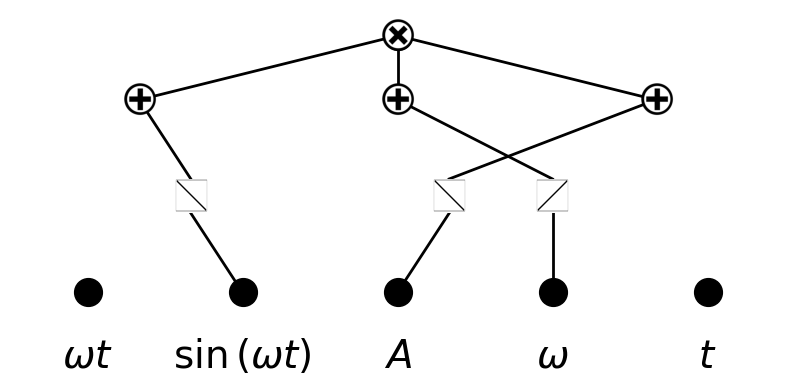

In [105]:


model.plot(in_vars=input_variables, scale=1.0, varscale=0.7)


In [106]:
model.auto_symbolic()

fixing (0,0,0) with 0
fixing (0,0,1) with 0
fixing (0,0,2) with 0
fixing (0,1,0) with x, r2=0.999999705190841, c=1
fixing (0,1,1) with 0
fixing (0,1,2) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,2,2) with x, r2=0.9999960566552055, c=1
fixing (0,3,0) with 0
fixing (0,3,1) with x, r2=0.9999954780176413, c=1
fixing (0,3,2) with 0
fixing (0,4,0) with 0
fixing (0,4,1) with 0
fixing (0,4,2) with 0
saving model version 0.5


In [107]:
sf = model.symbolic_formula(var=input_variables)[0][0]
sf

1.0*(3.75396908669501e-7 - 0.458653165797904*sin(omega*t))*(0.014900696282129 - 1.93934806175695*A)*(1.12002316386994*omega + 0.0147344430351299)

In [114]:
from kan.utils import ex_round 
from kan import nsimplify


nsimplify(ex_round(ex_round(ex_round(sf,1),1),2))

11*A*omega*sin(omega*t)/10

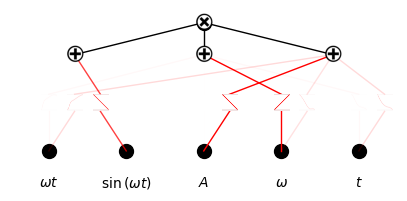

In [115]:
model.plot(metric='forward_u' , in_vars=input_variables , varscale= 0.5)

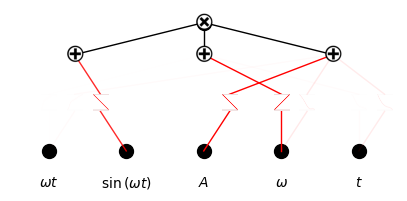

In [116]:
model.plot(metric='forward_n' , in_vars=input_variables , varscale= 0.5)


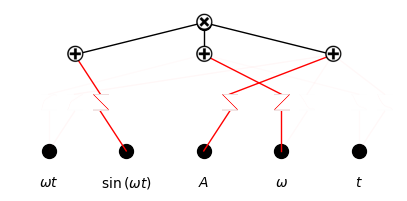

In [117]:
model.plot(metric='backward' , in_vars=input_variables , varscale= 0.5)
